## **BoomBikes - Demand for shared bikes**
   The factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   Which variables are significant in predicting the demand for shared bikes?

   How well those variables describe the bike demands?
   
   **Business objective:**

   You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Import the required libary and load the data from the CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd_day = pd.read_csv('day.csv')
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
pd_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
pd_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
pd_day.isna().value_counts()

instant  dteday  season  yr     mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  casual  registered  cnt  
False    False   False   False  False  False    False    False       False       False  False  False  False      False   False       False    730
dtype: int64

## **Data Preperation**
   It involves in cleaning and preparing the data for model training and testing

The dteday is redutant and its shows everyday data, so we remove the dteday data from the pd_day dataframe

Creating categorical variable for year instead of 0 and 1. The '0' denotes '2018' and '1' denotes '2019' replacing the respective values in pd_day dataframe

In [6]:
pd_day['yr'] = pd_day['yr'].apply(lambda x: "2018" if x==0 else "2019")
pd_day['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

Coverting seasons in pd_day dataframes as categorical variables as season (1:spring, 2:summer, 3:fall, 4:winter)

In [7]:
pd_day[['season']] = pd_day[['season']].apply(lambda x: x.map({1:"spring", 2:"summer", 3:"fall",4:"winter"}))
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Create a Categorical varaibles based on the weathersit scenerios
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy to **"ClearandCloudy"**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist to **"MistandCloudy"**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds to **"LowRainandSnow"**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog to **"HeavyRainandSnow"**

In [8]:
pd_day[['weathersit']] = pd_day[['weathersit']].apply(lambda x: x.map({1:"ClearandCloudy", 2:"MistandCloudy", 3:"LowRainandSnow",4:"HeavyRainandSnow"}))
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Create a Categorical varaibles based on the Weekday as 0-Sun,1-Mon,2-Tue,3-Wed,4-Thur,5-Fri and 6-Sat

In [9]:
pd_day[['weekday']] = pd_day[['weekday']].apply(lambda x: x.map({0:"Sun", 1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"}))
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,Sat,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,Sun,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,Mon,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,Tue,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,Wed,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
pd_day[['mnth']] = pd_day[['mnth']].apply(lambda x: x.map({1:"Jan", 2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}))
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Creating new variables such as temp_f and atemp_f from temp and atemp using celsius to fahrenheit conversion using formula given below

```
Temperature in degrees Fahrenheit (°F) = (Temperature in degrees Celsius (°C) * 9/5) + 32
```






Drop the dteday,instant,causal,registered variable which reductant and not useful variable for analysis on model. so drop the variables from pd_day dataframe

In [11]:
pd_day = pd_day.drop(labels=['dteday','instant','casual','registered'],axis=1)
pd_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,1600


**Plot agaist the dataset to better understanding**

1.pair plot to all the dataset

2.boxplot for the category

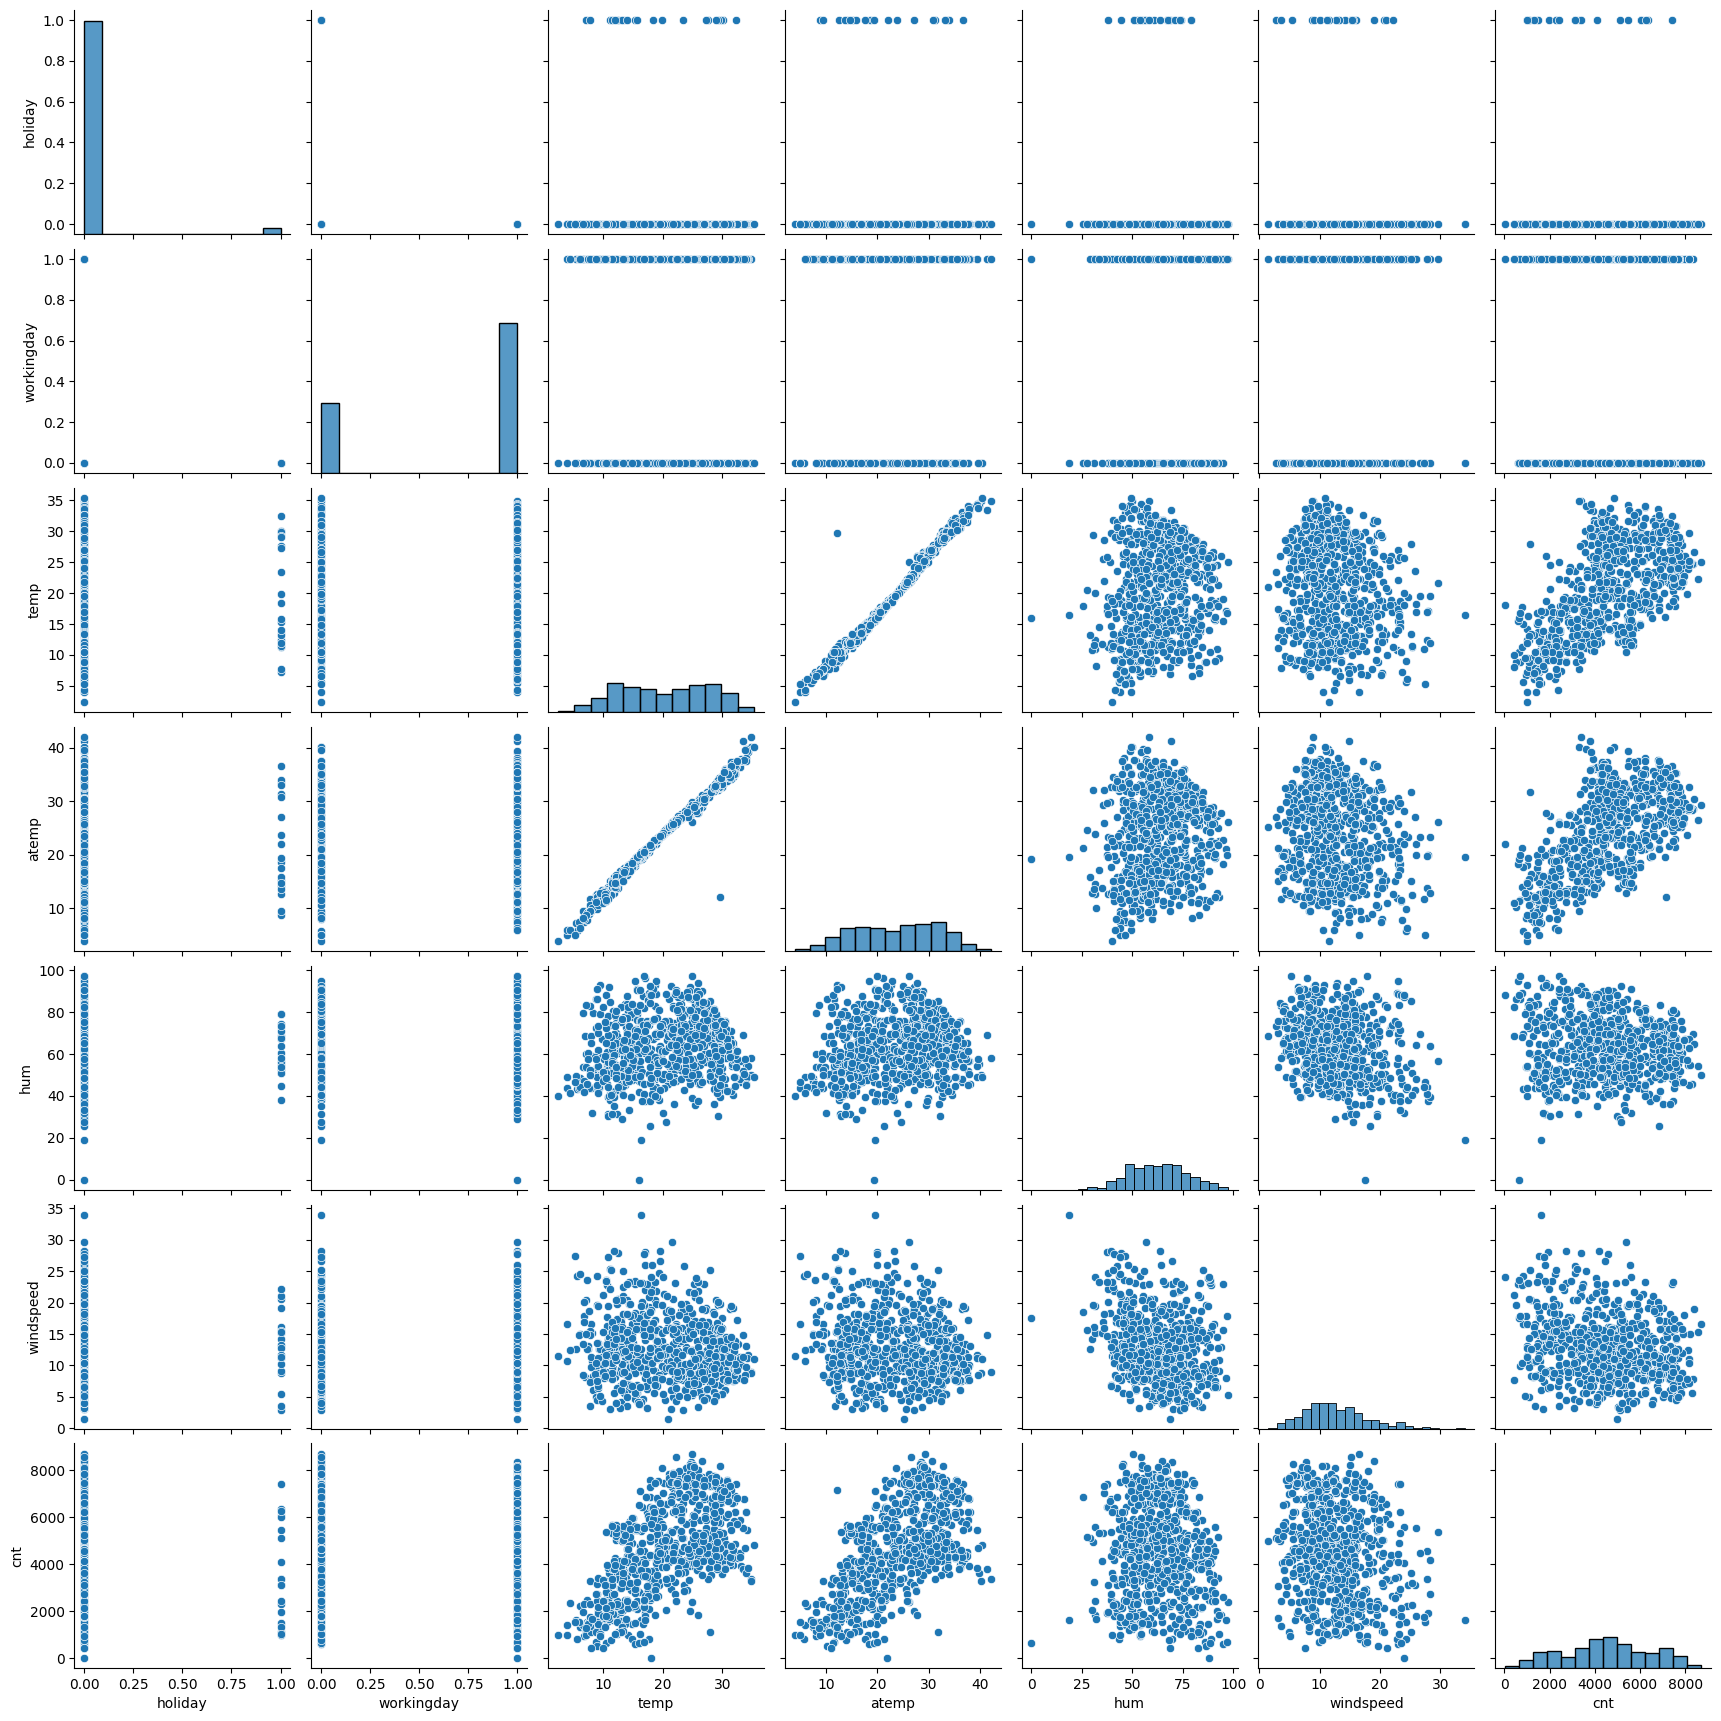

In [12]:
sns.pairplot(pd_day)
plt.show()

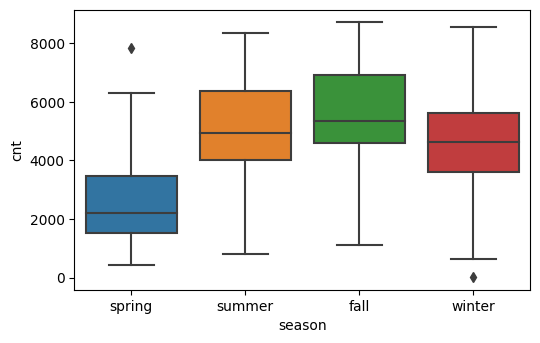

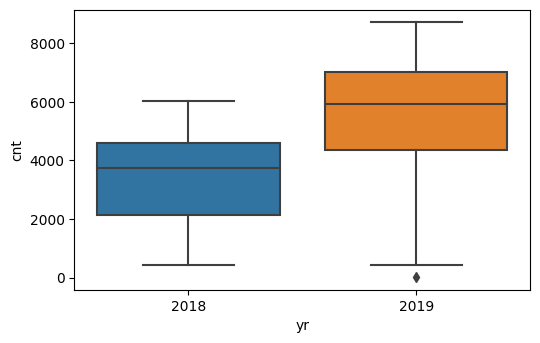

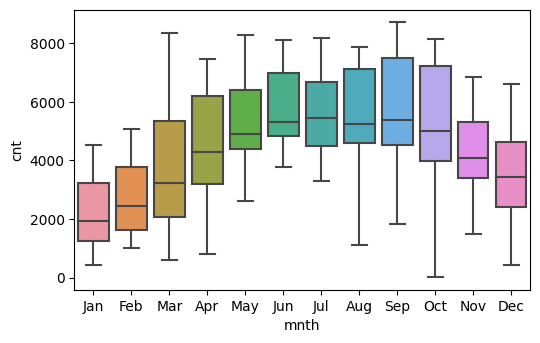

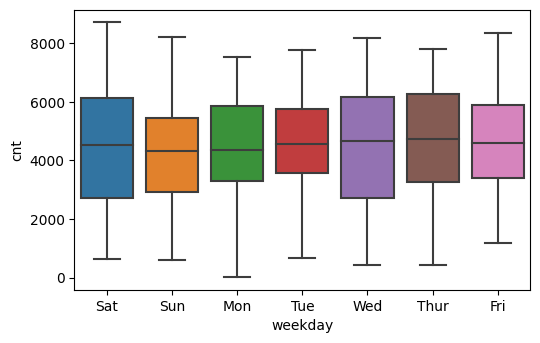

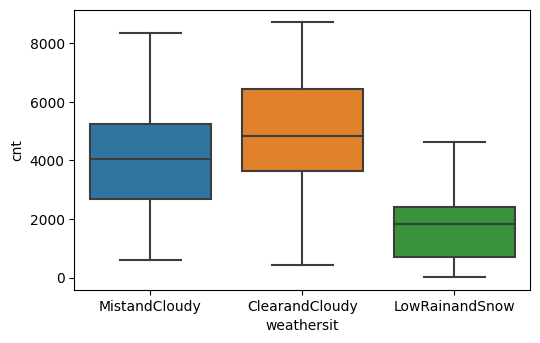

In [13]:
category = ['season','yr','mnth','weekday','weathersit']
for i in range(0,len(category)):
    plt.figure(figsize=(20,8))
    plt.subplot(2,3,i+1)
    sns.boxplot(x=category[i],y='cnt',data=pd_day)
    plt.show()

Create a dummy variables for the categorical variables season, year, weekday and weathersit and drop the varibles

In [14]:
#Create dummy variables for a Season variables
status = pd.get_dummies(pd_day['season'],drop_first=True)
print(status.head())
pd_day['summer'] = status['summer']
pd_day['spring'] = status['spring']
pd_day['winter'] = status['winter']
pd_day = pd_day.drop(labels=['season'],axis=1)
pd_day.head()

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,spring,winter
0,2018,Jan,0,Sat,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0
1,2018,Jan,0,Sun,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0
2,2018,Jan,0,Mon,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,1349,0,1,0
3,2018,Jan,0,Tue,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,1562,0,1,0
4,2018,Jan,0,Wed,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,1600,0,1,0


In [15]:
#Create dummy variables for a weekdays variables
status = pd.get_dummies(pd_day['weekday'],drop_first=True)
print(status.head())
pd_day['Mon'] = status['Mon']
pd_day['Tue'] = status['Tue']
pd_day['Wed'] = status['Wed']
pd_day['Thur'] = status['Thur']
pd_day['Sun'] = status['Sun']
pd_day['Sat'] = status['Sat']
pd_day = pd_day.drop(labels=['weekday'],axis=1)
pd_day.head()

   Mon  Sat  Sun  Thur  Tue  Wed
0    0    1    0     0    0    0
1    0    0    1     0    0    0
2    1    0    0     0    0    0
3    0    0    0     0    1    0
4    0    0    0     0    0    1


,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,spring,winter,Mon,Tue,Wed,Thur,Sun,Sat
0,2018,Jan,0,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1
1,2018,Jan,0,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,1,0
2,2018,Jan,0,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0
3,2018,Jan,0,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,0,0,0
4,2018,Jan,0,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,1,0,0,0


In [16]:
#Create dummy variables for a Month variables
status = pd.get_dummies(pd_day['mnth'],drop_first=True)
print(status.head())
pd_day['Jan'] = status['Jan']
pd_day['Feb'] = status['Feb']
pd_day['Mar'] = status['Mar']
pd_day['May'] = status['May']
pd_day['Jun'] = status['Jun']
pd_day['Jul'] = status['Jul']
pd_day['Aug'] = status['Aug']
pd_day['Sep'] = status['Sep']
pd_day['Oct'] = status['Oct']
pd_day['Nov'] = status['Nov']
pd_day['Dec'] = status['Dec']
pd_day = pd_day.drop(labels=['mnth'],axis=1)
pd_day.head()

   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0


,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,0,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,0,1,ClearandCloudy,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,1,ClearandCloudy,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,0,1,ClearandCloudy,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Create dummy variables for a weathersit variables
status = pd.get_dummies(pd_day['weathersit'],drop_first=True)
print(status.head())
pd_day['LowRainandSnow'] = status['LowRainandSnow']
pd_day['MistandCloudy'] = status['MistandCloudy']
pd_day = pd_day.drop(labels=['weathersit'],axis=1)
pd_day.head()

   LowRainandSnow  MistandCloudy
0               0              1
1               0              1
2               0              0
3               0              0
4               0              0


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,spring,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,LowRainandSnow,MistandCloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Create dummy variables for a weathersit variables
status = pd.get_dummies(pd_day['yr'],drop_first=True)
print(status.head())
pd_day['2019'] = status['2019']
pd_day = pd_day.drop(labels=['yr'],axis=1)
pd_day.head()

   2019
0     0
1     0
2     0
3     0
4     0


,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,spring,winter,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,LowRainandSnow,MistandCloudy,2019
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# **Preparing the Model**
  The dataset is split into training and testing set and get normalized the numerical variables using min max normalizer

In [19]:
bike_share_train,bike_share_test = train_test_split(pd_day,train_size=0.7,test_size=0.3,random_state=100)

In [20]:
scaler = MinMaxScaler()
num_variables = ['temp','atemp','hum','windspeed']
bike_share_train[num_variables] = scaler.fit_transform(bike_share_train[num_variables])
print(bike_share_train.head())
bike_share_test[num_variables] = scaler.transform(bike_share_test[num_variables])
print(bike_share_test.head())


     holiday  workingday      temp     atemp       hum  windspeed   cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  7534   
576        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728        0           0  0.245101  0.200348  0.498067   0.663106  1796   
482        0           0  0.395666  0.391735  0.504508   0.188475  4220   

     summer  spring  winter  ...  Jun  Jul  Aug  Sep  Oct  Nov  Dec  \
653       0       0       1  ...    0    0    0    0    1    0    0   
576       0       0       0  ...    0    1    0    0    0    0    0   
426       0       1       0  ...    0    0    0    0    0    0    0   
728       0       1       0  ...    0    0    0    0    0    0    1   
482       1       0       0  ...    0    0    0    0    0    0    0   

     LowRainandSnow  MistandCloudy  2019  
653               0              0     1  
576               0              0  

(510, 30)


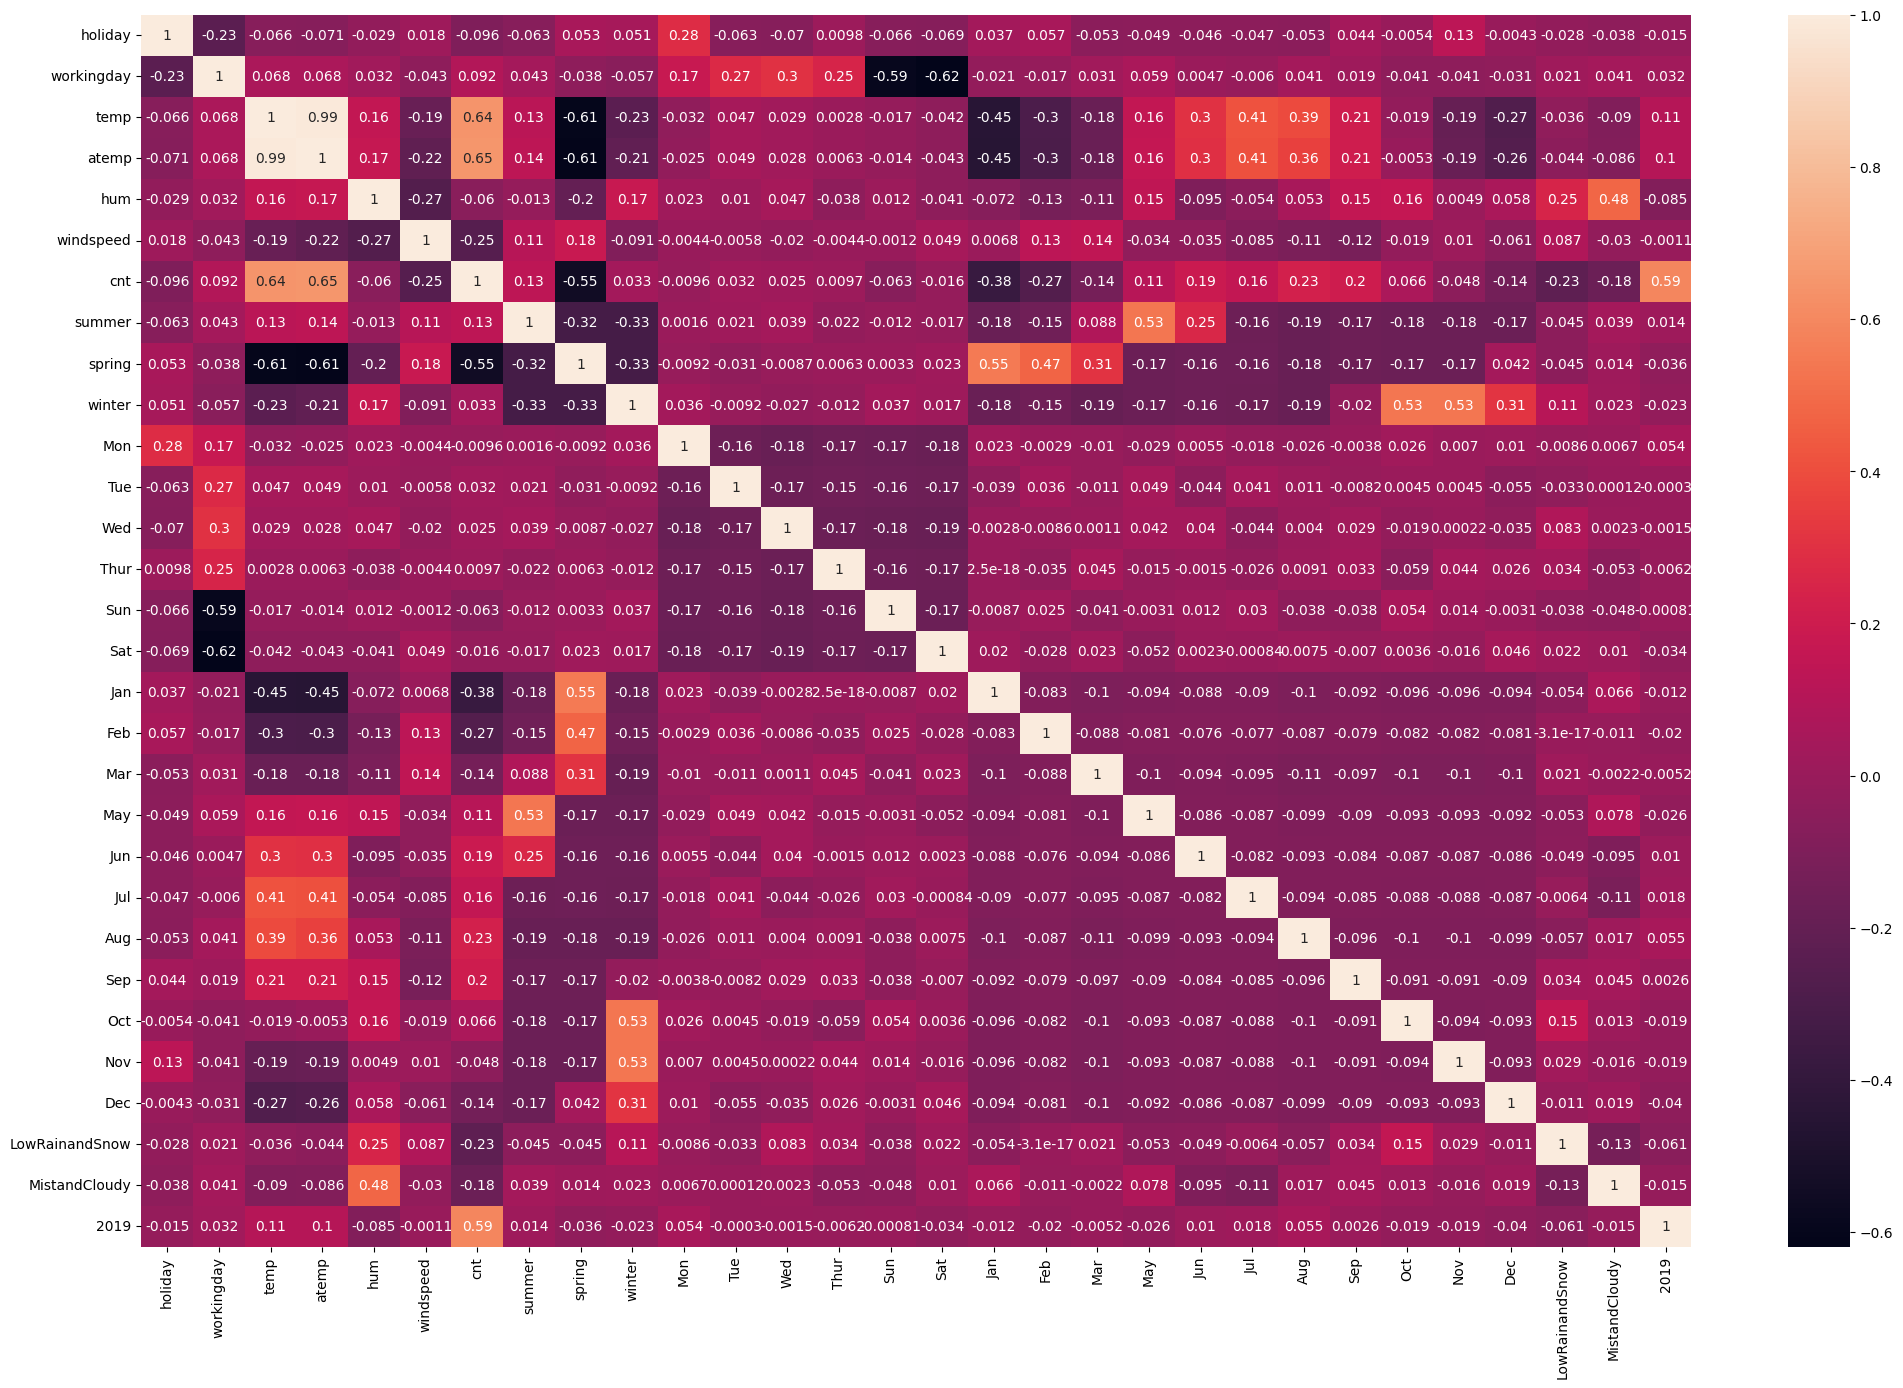

In [21]:
corr = bike_share_train.corr()
print(bike_share_train.shape)
plt.figure(figsize=(25,16))
sns.heatmap(corr,annot=True)
plt.show()

### **Model Building**

In [22]:
y_train = bike_share_train.pop('cnt')
X_train = bike_share_train
y_test = bike_share_test.pop('cnt')
X_test = bike_share_test

Training model with variables which is highly correlated with the target varibales "cnt" and working on the feature selection

In [23]:
corr['cnt']

holiday          -0.095961
workingday        0.092320
temp              0.643517
atemp             0.646475
hum              -0.059993
windspeed        -0.253794
cnt               1.000000
summer            0.134343
spring           -0.548871
winter            0.032636
Mon              -0.009552
Tue               0.031883
Wed               0.025216
Thur              0.009710
Sun              -0.063385
Sat              -0.016215
Jan              -0.378173
Feb              -0.270287
Mar              -0.137537
May               0.113027
Jun               0.187821
Jul               0.157812
Aug               0.227229
Sep               0.201327
Oct               0.065692
Nov              -0.048130
Dec              -0.143598
LowRainandSnow   -0.226598
MistandCloudy    -0.175530
2019              0.591508
Name: cnt, dtype: float64

In [24]:
X_train_sm =sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           5.80e-61
Time:                        09:25:21   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.000    1161.819    1833.946
temp        5562.4587    293.549     18.949      0.000    4985.738    6139.179
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_train_sm =sm.add_constant(X_train[['temp','atemp']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.95e-60
Time:                        09:25:21   Log-Likelihood:                -4449.0
No. Observations:                 510   AIC:                             8904.
Df Residuals:                     507   BIC:                             8917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1442.1252    172.864      8.343      0.000    1102.507    1781.744
temp        1580.3615   2028.745      0.779      0.436   -2405.421    5566.144
atemp       4279.2110   2157.304      1.984      0.048      40.855    8517.568
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X_train_sm =sm.add_constant(X_train[['temp','atemp']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.95e-60
Time:                        09:25:21   Log-Likelihood:                -4449.0
No. Observations:                 510   AIC:                             8904.
Df Residuals:                     507   BIC:                             8917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1442.1252    172.864      8.343      0.000    1102.507    1781.744
temp        1580.3615   2028.745      0.779      0.436   -2405.421    5566.144
atemp       4279.2110   2157.304      1.984      0.048      40.855    8517.568
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           4.44e-63
Time:                        09:25:21   Log-Likelihood:                -4442.8
No. Observations:                 510   AIC:                             8892.
Df Residuals:                     507   BIC:                             8904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1657.4013    181.287      9.142      0.000    1301.235    2013.567
atemp          5846.5825    308.687     18.940      0.000    5240.119    6453.046
MistandCloudy  -496.1620    137.958     -3.596      0.000    -767.201    -225.123
==============================================================================
Omnibus:                        1.828   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.696
Skew:                           0.050   Prob(JB):                        0.428
Kurtosis:                       2.736   Cond. No.                         6.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy','Dec']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     128.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           5.16e-62
Time:                        09:25:21   Log-Likelihood:                -4442.5
No. Observations:                 510   AIC:                             8893.
Df Residuals:                     506   BIC:                             8910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1607.7799    192.187      8.366      0.000    1230.197    1985.362
atemp          5911.7963    319.920     18.479      0.000    5283.262    6540.330
MistandCloudy  -495.7106    138.012     -3.592      0.000    -766.858    -224.564
Dec             189.9167    243.431      0.780      0.436    -288.344     668.177
==============================================================================
Omnibus:                        1.414   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.389
Skew:                           0.048   Prob(JB):                        0.499
Kurtosis:                       2.763   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
DX_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy','spring']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     128.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           5.16e-62
Time:                        09:25:21   Log-Likelihood:                -4442.5
No. Observations:                 510   AIC:                             8893.
Df Residuals:                     506   BIC:                             8910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1607.7799    192.187      8.366      0.000    1230.197    1985.362
atemp          5911.7963    319.920     18.479      0.000    5283.262    6540.330
MistandCloudy  -495.7106    138.012     -3.592      0.000    -766.858    -224.564
Dec             189.9167    243.431      0.780      0.436    -288.344     668.177
==============================================================================
Omnibus:                        1.414   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.389
Skew:                           0.048   Prob(JB):                        0.499
Kurtosis:                       2.763   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy','spring','Aug']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           7.63e-69
Time:                        09:25:21   Log-Likelihood:                -4424.0
No. Observations:                 510   AIC:                             8858.
Df Residuals:                     505   BIC:                             8879.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2701.8422    245.818     10.991      0.000    2218.891    3184.794
atemp          4373.6086    397.956     10.990      0.000    3591.756    5155.461
MistandCloudy  -538.9808    133.576     -4.035      0.000    -801.413    -276.548
spring        -1156.4807    185.968     -6.219      0.000   -1521.847    -791.115
Aug              73.4275    229.785      0.320      0.749    -378.024     524.879
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.791
Skew:                          -0.043   Prob(JB):                        0.673
Kurtosis:                       2.828   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy','spring','Sep']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           9.19e-70
Time:                        09:25:21   Log-Likelihood:                -4421.9
No. Observations:                 510   AIC:                             8854.
Df Residuals:                     505   BIC:                             8875.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2704.0164    240.179     11.258      0.000    2232.144    3175.889
atemp          4304.7366    378.944     11.360      0.000    3560.237    5049.237
MistandCloudy  -553.7764    133.074     -4.161      0.000    -815.223    -292.330
spring        -1133.8206    185.193     -6.122      0.000   -1497.664    -769.977
Sep             494.8074    236.636      2.091      0.037      29.895     959.720
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                1.038
Skew:                          -0.074   Prob(JB):                        0.595
Kurtosis:                       2.836   Cond. No.                         8.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train_sm =sm.add_constant(X_train[['atemp','MistandCloudy','spring','Sep','2019']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     324.7
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          4.92e-155
Time:                        09:25:21   Log-Likelihood:                -4220.0
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     504   BIC:                             8477.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1992.9458    164.383     12.124      0.000    1669.985    2315.906
atemp          3645.6341    256.731     14.200      0.000    3141.239    4150.029
MistandCloudy  -545.3752     89.667     -6.082      0.000    -721.543    -369.207
spring        -1236.9686    124.855     -9.907      0.000   -1482.269    -991.668
Sep             562.9828    159.472      3.530      0.000     249.671     876.295
2019           2098.8736     85.101     24.663      0.000    1931.678    2266.070
==============================================================================
Omnibus:                      138.019   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.321
Skew:                          -1.180   Prob(JB):                    3.46e-117
Kurtosis:                       7.435   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_train_sm =sm.add_constant(X_train[['atemp','spring','Sep','2019','MistandCloudy','Jul']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     278.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.49e-156
Time:                        09:25:21   Log-Likelihood:                -4214.0
No. Observations:                 510   AIC:                             8442.
Df Residuals:                     503   BIC:                             8472.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1846.7145    167.995     10.993      0.000    1516.655    2176.774
atemp          4041.2519    278.425     14.515      0.000    3494.232    4588.271
spring        -1190.2935    124.244     -9.580      0.000   -1434.394    -946.193
Sep             462.4004    160.402      2.883      0.004     147.260     777.540
2019           2088.3966     84.240     24.791      0.000    1922.892    2253.901
MistandCloudy  -567.7947     88.938     -6.384      0.000    -742.531    -393.059
Jul            -614.1588    177.139     -3.467      0.001    -962.181    -266.136
==============================================================================
Omnibus:                      141.829   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.417
Skew:                          -1.197   Prob(JB):                    9.21e-127
Kurtosis:                       7.646   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF is an index that provides a measure of how much the variance of an estimated regression coefficient increases due to collinearity.Apply VIF with the trained data for feature selection

In [34]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.42e-181
Time:                        09:25:21   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2149.1961    306.569      7.

,Features,VIF
1,workingday,85.60
2,temp,67.12
3,atemp,56.09
14,Sat,19.72
13,Sun,18.35
7,spring,10.80
8,winter,9.52
6,summer,8.31
24,Nov,6.80
23,Oct,6.59


Feature Selection using RFE method for the model

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe= RFE(estimator=lm,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', False, 6),
 ('spring', True, 1),
 ('winter', False, 5),
 ('Mon', False, 14),
 ('Tue', False, 15),
 ('Wed', False, 18),
 ('Thur', False, 17),
 ('Sun', True, 1),
 ('Sat', True, 1),
 ('Jan', False, 7),
 ('Feb', False, 10),
 ('Mar', False, 20),
 ('May', False, 12),
 ('Jun', False, 19),
 ('Jul', False, 2),
 ('Aug', False, 13),
 ('Sep', False, 4),
 ('Oct', False, 16),
 ('Nov', False, 8),
 ('Dec', False, 9),
 ('LowRainandSnow', True, 1),
 ('MistandCloudy', False, 3),
 ('2019', True, 1)]

In [37]:
ranked_features = X_train.columns[rfe.support_]
ranked_features

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'Sun',
       'Sat', 'LowRainandSnow', '2019'],
      dtype='object')

Based on the above feature selection based on that we dropped the feature and try to selected suitable feature for the model

Model Building with combinations features selected with above feature selection methods (Automated and Manual) and below model is iterated with the feature and filter using adjusted R2 score features are given in selected_features

In [38]:
selected_features = ['2019','holiday','LowRainandSnow','windspeed','spring','Jul','Sep','temp','Mar','MistandCloudy','winter']
X_train_sm = sm.add_constant(X_train[selected_features])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("\nDurbin-Watson_statistic:",durbin_watson(lr_model.resid),"\n")
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values,i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.39e-187
Time:                        09:25:21   Log-Likelihood:                -4127.9
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2186.0680    207.080     10.

,Features,VIF
7,temp,4.61
3,windspeed,4.04
0,2019,2.06
4,spring,1.75
9,MistandCloudy,1.51
10,winter,1.41
5,Jul,1.36
8,Mar,1.26
6,Sep,1.21
2,LowRainandSnow,1.08


Plot the residual for train data using prediction method of build model

<Axes: title={'center': 'Train - Normal distrbution of error term'}, ylabel='Density'>

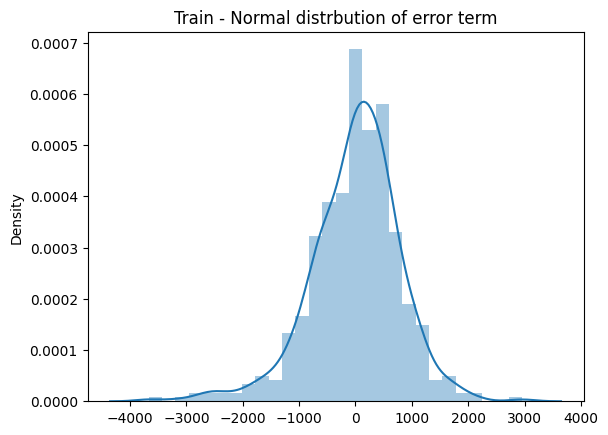

In [39]:
y_train_pred = lr_model.predict(X_train_sm)
res_train = y_train - y_train_pred
plt.title("Train - Normal distrbution of error term")
sns.distplot(res_train)

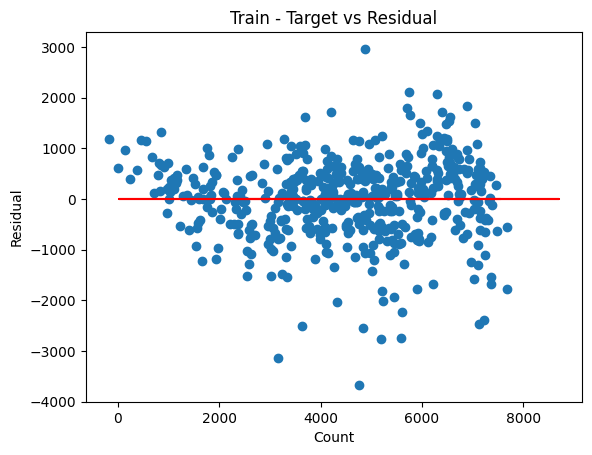

In [40]:
plt.scatter(y_train_pred,res_train)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title("Train - Target vs Residual")
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Plot the residual for test using prediction method of build model

<Axes: title={'center': 'Test - Normal distrbution of error term'}, ylabel='Density'>

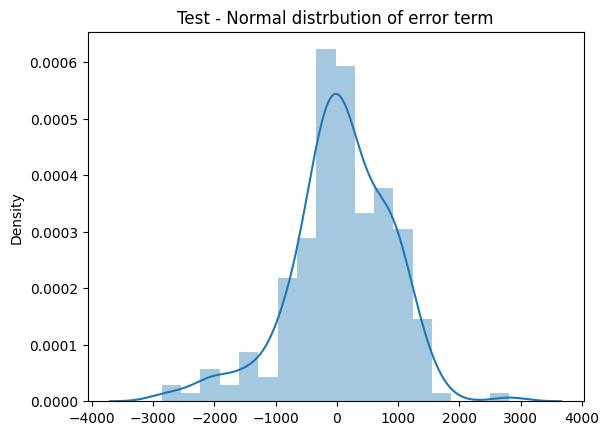

In [41]:
from sklearn.metrics import r2_score
X_test_sm = sm.add_constant(X_test[selected_features])
y_test_pred = lr_model.predict(X_test_sm)
res_test = y_test - y_test_pred
plt.title("Test - Normal distrbution of error term")
sns.distplot(res_test)

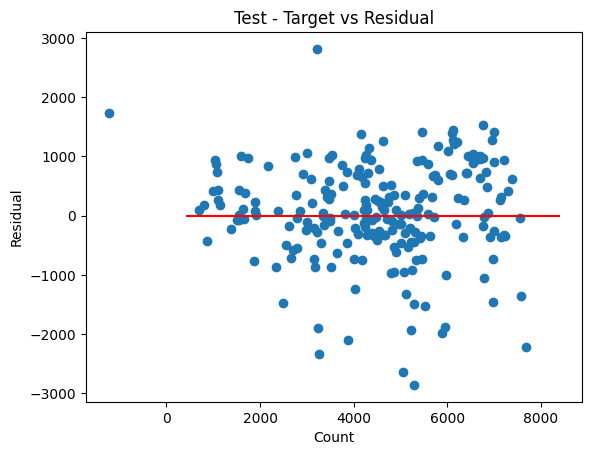

In [42]:
plt.scatter(y_test_pred,res_test)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title("Test - Target vs Residual")
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Calculate the r2_Score for the test data set using target vs predicted target

In [43]:
round(r2_score(y_test,y_test_pred),2)

0.81

In [44]:
mean_squared_error(y_test,y_test_pred)

681955.9661335284

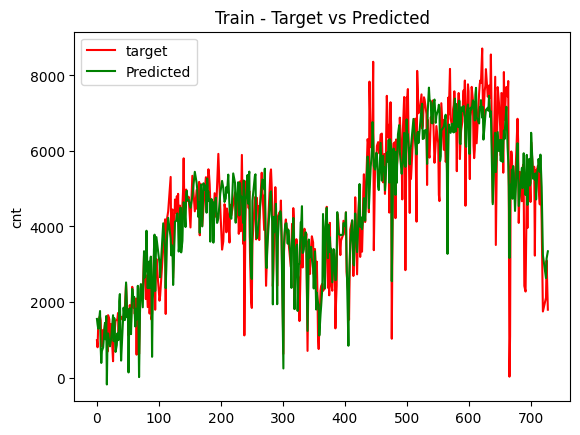

In [45]:
sns.lineplot(y_train,label='target',color='red')
sns.lineplot(y_train_pred,label='Predicted',color='green')
plt.title("Train - Target vs Predicted")
plt.show()

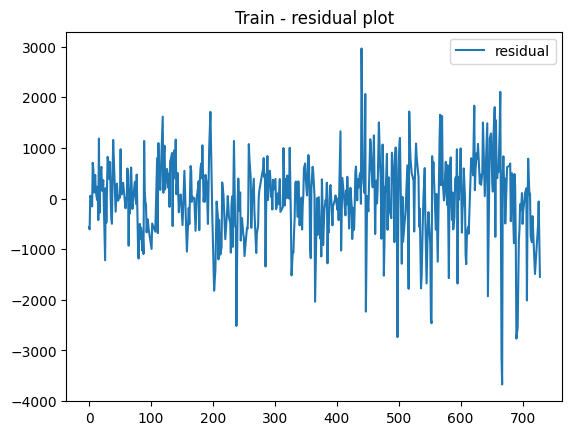

In [46]:
sns.lineplot(res_train,label='residual')
plt.title("Train - residual plot")
plt.show()

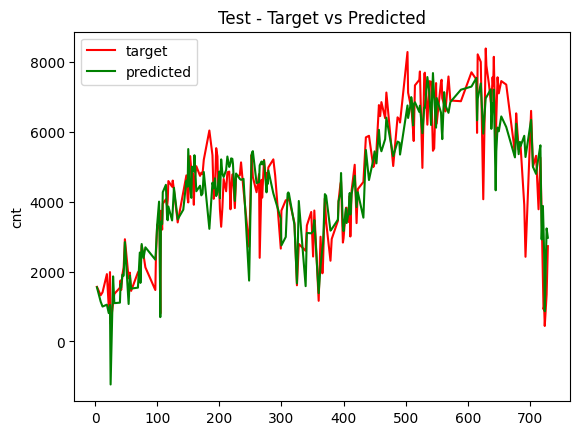

In [47]:
sns.lineplot(y_test,label='target',color='red')
sns.lineplot(y_test_pred,label='predicted',color='green')
plt.title("Test - Target vs Predicted")
plt.show()

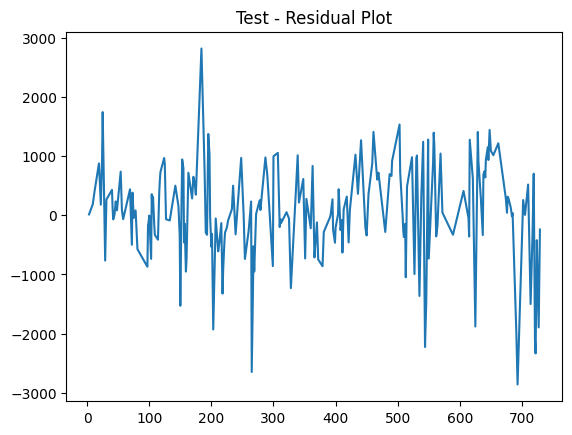

In [48]:
sns.lineplot(res_test)
plt.title("Test - Residual Plot")
plt.show()

Feature: 2019, Score: 2033.64173
Feature: holiday, Score: -819.74379
Feature: LowRainandSnow, Score: -2510.57190
Feature: windspeed, Score: -1254.66710
Feature: spring, Score: -1010.25520
Feature: Jul, Score: -606.66553
Feature: Sep, Score: 520.28944
Feature: temp, Score: 3937.52655
Feature: Mar, Score: 319.21269
Feature: MistandCloudy, Score: -703.98768
Feature: winter, Score: 440.59056


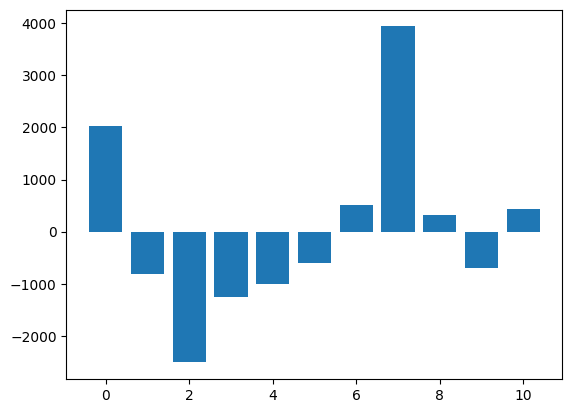

In [49]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train[selected_features], y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (selected_features[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()